# PROJECT - CHD

THESE ARE THE FEATURES 

 - male: Indicates gender (1 for male, 0 for female).
 - age: Age of the individual.
 - education: Likely a categorical variable representing education levels.
 - currentSmoker: Whether the individual is a current smoker (1 for yes, 0 for no).
 - cigsPerDay: Average number of cigarettes smoked per day.
 - BPMeds: Whether the individual is on blood pressure medication (1 for yes, 0 for no).
 - prevalentStroke: History of stroke (1 for yes, 0 for no).
 - prevalentHyp: History of hypertension (high blood pressure) (1 for yes, 0 for no).
 - diabetes: Whether the individual has diabetes (1 for yes, 0 for no).
 - totChol: Total cholesterol level.
 - sysBP: Systolic blood pressure.
 - diaBP: Diastolic blood pressure.
 - BMI: Body Mass Index.
 - heartRate: Heart rate (beats per minute).
 - glucose: Blood glucose level.
 - TenYearCHD: The target variable indicating the 10-year risk of CHD.



### License 

  data sets : https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression?resource=download


  lower the threshold
Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actually is one) is more dangerous than a False Positive in this case. Hence in order to increase the sensitivity, threshold can be lowered.

# DATA COLLECTION

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('framingham.csv')

In [82]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [83]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [85]:
df.sample(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
952,1,66,1.0,1,30.0,0.0,0,0,1,234.0,114.5,62.5,28.62,75.0,216.0,1
1973,1,48,4.0,1,20.0,0.0,0,0,0,236.0,112.5,75.0,30.43,72.0,67.0,0
3971,1,64,3.0,0,0.0,0.0,0,1,1,195.0,176.0,78.0,24.90,95.0,370.0,0
2242,0,50,2.0,1,20.0,0.0,0,0,0,202.0,138.0,72.0,25.03,110.0,98.0,0
1571,1,47,1.0,0,0.0,0.0,0,0,0,219.0,116.0,82.0,24.05,58.0,87.0,0
2835,0,40,1.0,1,50.0,NaN,0,0,0,220.0,124.0,79.0,20.70,90.0,57.0,0
103,0,48,1.0,0,0.0,0.0,0,1,0,265.0,145.0,77.0,24.23,74.0,64.0,0
2514,0,36,1.0,0,0.0,0.0,0,0,0,211.0,100.0,61.5,22.19,60.0,73.0,0
2476,1,57,1.0,1,20.0,0.0,0,0,0,198.0,128.0,85.0,28.18,85.0,99.0,0
2085,0,46,1.0,1,20.0,0.0,0,0,0,185.0,137.0,90.0,25.20,82.0,NaN,0


# DATA CLEANING

## Handling missing value 

In [86]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [87]:
df[df.isnull().any(axis=1)]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


### Analayzing effected feature

In [88]:
for i in range(0,len(df.columns)):
    if df[df.columns[i]].isnull().sum() / len(df) > 0.3:
        print(df.columns[i])

# no such type of feature is availble which's sum of null value  is 30% greater than overall row 

### list the name of features which have null value and calculating the percentage of total null value 

In [89]:
null_feature = []
for i in range(0,len(df.columns)):
    if df[df.columns[i]].isnull().sum() != 0:
        percentage = round(df[df.columns[i]].isnull().sum()/df.shape[0] * 100,2)
        print(f'\n---{df.columns[i]}---')
        print(f'{df.columns[i]} : {str(df[df.columns[i]].isnull().sum())} with {percentage} % ')
        null_feature.append(df.columns[i])



---education---
education : 105 with 2.48 % 

---cigsPerDay---
cigsPerDay : 29 with 0.68 % 

---BPMeds---
BPMeds : 53 with 1.25 % 

---totChol---
totChol : 50 with 1.18 % 

---BMI---
BMI : 19 with 0.45 % 

---heartRate---
heartRate : 1 with 0.02 % 

---glucose---
glucose : 388 with 9.16 % 


### Handling missing values

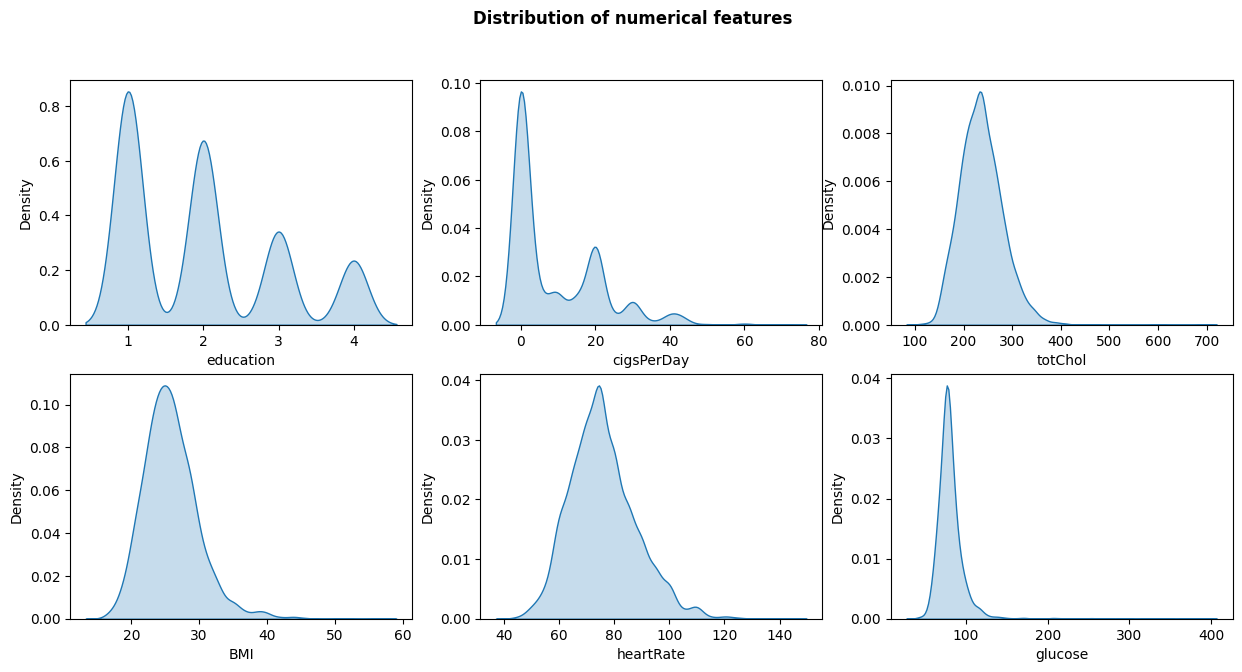

In [105]:
numerical_null_feature = [x for x in null_feature if x!='BPMeds']
plt.figure(figsize=(15,7))
plt.suptitle('Distribution of numerical features',fontsize=12,fontweight='bold')
for x in range(0,len(numerical_null_feature)):
    plt.subplot(2,3,x+1)
    sns.kdeplot(df[numerical_null_feature[x]], fill=True)

#### calculating skweness

In [102]:
for x in range(0,len(numerical_null_feature)):
    print(f'{df[numerical_null_feature[x]].skew()}')

0.6971713034206299
1.2574722480687608
0.8787183592102467
0.9854415627473001
0.6446081818772712
6.5414761215855615


 - Skewness > 0: Right-skewed (use median).
 - Skewness < 0: Left-skewed (use median).
 - Skewness ≈ 0: Symmetric (use mean).
 - copied by chatGPT

#### conclusion 
 using median for handling null value of numerical feature


In [103]:

# Handling missing value 
for feature in null_feature:
    if feature == 'BPMeds':
        df[feature] = df[feature].fillna(df[feature].mode()[0])
        df[feature] = df[feature].astype(int)
    else:
        df[feature] = df[feature].fillna(df[feature].median())

# if distribution of feature (numerical) data seems normal gaussian distribution do mean else medium
# insight , some of the feature are shown skwed manner

In [104]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Ensure about data types 

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   int64  
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 529.9 KB


## Identifying Outlier in numerical feature 

In [107]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.979471,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.689476,132.352407,82.893464,25.800205,75.878716,81.603587,0.151958
std,0.495022,8.572160,1.007081,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.327427,22.038097,11.910850,4.071041,12.025185,22.865246,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### method 1 : using IQR
 - observation while finding outlier using IQR we faced an issue that no of outlier is equal to the total number of rows ,
 - it was hapeening by due to specific skewed (long tail) cases in ditribution
 - so we use z-score for finding outlier

In [108]:
q1 = df['diaBP'].quantile(0.25)
q3 = df['diaBP'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 3.0 * iqr
upper_bound = q3 + 3.0 * iqr
outlier = df[(df['diaBP']<lower_bound) | (df['diaBP']>upper_bound)]
outlier.shape[0]

6

### method 2 : using Z-score 

In [116]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes == 'float']
numerical_features

['education',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [122]:
def check_outlier(data):
    list = []
    for i in range(0,len(data)):
        dataz[data[i]] = zscore(df[data[i]])  # X - mean / standard deviation also mean + 3 * 22[std of feature of glocose ]
        outliers = dataz[dataz[data[i]].abs() > 3]
        list.append(outliers.shape[0])
    return list

In [123]:
from scipy.stats import zscore
dataz = pd.DataFrame()
a_list = check_outlier(numerical_features)
for x in range(0,len(a_list)):
    print(f' {numerical_features[x]} have {a_list[x]} outliers ')

 education have 0 outliers 
 cigsPerDay have 21 outliers 
 totChol have 25 outliers 
 sysBP have 48 outliers 
 diaBP have 41 outliers 
 BMI have 60 outliers 
 heartRate have 23 outliers 
 glucose have 50 outliers 


## Visualizing outlier 

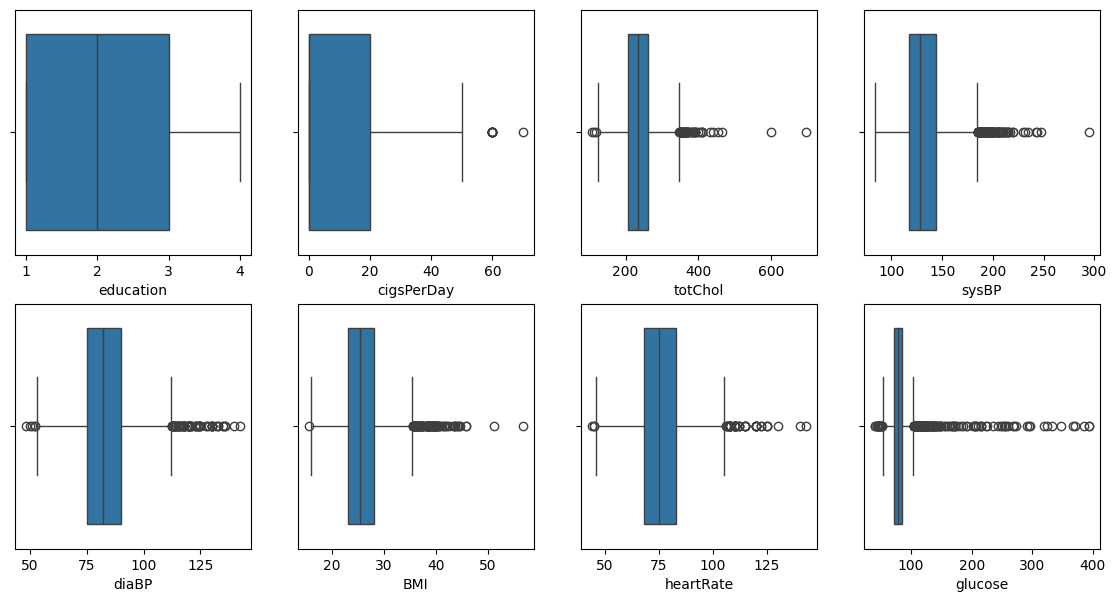

In [124]:
plt.figure(figsize=(14,7))
for x in range(0,len(numerical_features)):
    plt.subplot(2,4,x+1)
    sns.boxplot(x=df[numerical_features[x]])

In [114]:
dataz

,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,2.006559,-0.751322,-0.940600,-1.195907,-1.082625,0.287379,0.342761,-0.201359
1,0.020387,-0.751322,0.300313,-0.515187,-0.158988,0.719752,1.590291,-0.245099
2,-0.972700,0.929210,0.187503,-0.220209,-0.242955,-0.113057,-0.073082,-0.507537
3,1.013473,1.769476,-0.263739,0.800871,1.016549,0.682902,-0.904768,0.935872
4,1.013473,1.181289,1.089985,-0.106755,0.092912,-0.663350,0.758605,0.148558
...,...,...,...,...,...,...,...,...
4233,-0.972700,-0.667296,1.721723,2.116930,0.764648,0.041713,-0.821599,0.192298
4234,1.013473,2.861821,-0.669856,-0.265590,-0.242955,-1.496159,-0.904768,-0.595016
4235,0.020387,0.929210,0.255189,-0.061374,-0.914691,-0.933583,0.675436,0.192298
4236,-0.972700,0.509077,-0.602170,-0.265590,0.344813,-1.631275,0.841773,-0.157620


### Treating the Outlier 

  - Removing outliers is a good option if there are errors or wrong analysis.
  - Transforming data can make outliers less extreme.
  - Capping outliers is another way to limit their influence.
  - For valid outliers, you may decide to leave them as they are or apply robust methods.
  - copied from GPT

In [127]:
numerical_features

['education',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

#### what is cappling ? 

What is Capping?
Capping involves limiting the values of the outliers to a certain threshold (upper or lower limit). The idea is to keep extreme values in the data but restrict them to a reasonable range. This prevents outliers from disproportionately affecting the analysis or model without removing them entirely.

Simple Example of Capping
 - Let’s say you have the following data for a feature called age:

<table border = 1>
<tr>
    <th align = 'center' colspan = 8>AGE</th>
</tr>
<tr>
    <td>25</td>
    <td>30</td>
    <td>35</td>
    <td>40</td>
    <td>120</td>
    <td>100</td>
    <td>85</td>
    <td>22</td>
</tr>
</table>


In this dataset, the values 120 and 100 seem like outliers (maybe someone entered an incorrect value for age). You can cap these values to a reasonable upper threshold, like 80, instead of removing them.

Steps to Cap Outliers:
Determine a Threshold: For this example, let’s say we set the upper limit (cap) to 80.

Identify the Outliers: Any values greater than 80 are considered outliers.

Apply the Cap: Change any value above 80 to 80.

After capping, the dataset would look like this:

<table border = 1>
<tr>
    <th align = 'center' colspan = 8>AGE</th>
</tr>
<tr>
    <td>25</td>
    <td>30</td>
    <td>35</td>
    <td>40</td>
    <td><span style ="color : red">80</span></td>
    <td><span style ="color : red">80</span></td>
    <td>85</td>
    <td>22</td>
</tr>
</table>

Now, the outliers (120 and 100) have been replaced with the capped value of 80. This ensures the data is within a reasonable range without completely removing those rows.



#### When to Use Capping?
Use capping when:
 - You believe the outliers are valid but extreme (e.g., rare medical cases, extreme behaviors).
 - You don’t want to lose valuable information by removing outliers entirely.
 - You want to ensure that the outliers don't have too much influence on statistical measures like the mean.

#### by capping the medical feattures like sysBP, diaBP,totChol, and glucose 

In [128]:
df['glucose'].describe()

count    4238.000000
mean       81.603587
std        22.865246
min        40.000000
25%        72.000000
50%        78.000000
75%        85.000000
max       394.000000
Name: glucose, dtype: float64

In [129]:
upper_value = df['glucose'].quantile(0.95)
lower_value = df['glucose'].quantile(0.05)
df['glucose'] = df['glucose'].clip(lower=lower_value,upper=upper_value)

In [130]:
df['glucose'].describe()  

count    4238.000000
mean       79.763332
std        11.450539
min        62.000000
25%        72.000000
50%        78.000000
75%        85.000000
max       107.000000
Name: glucose, dtype: float64

In [131]:
#before capping 
df['sysBP'].describe()

count    4238.000000
mean      132.352407
std        22.038097
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64

In [132]:
bp = ['sysBP','diaBP','totChol']
for i in range(len(bp)):
    upper_value = df[bp[i]].quantile(0.95)
    lower_value = df[bp[i]].quantile(0.05)
    df[bp[i]] = df[bp[i]].clip(lower=lower_value,upper=upper_value)

In [133]:
#after capping 
df['sysBP'].describe()

count    4238.000000
mean      131.761444
std        19.410165
min       104.000000
25%       117.000000
50%       128.000000
75%       144.000000
max       175.000000
Name: sysBP, dtype: float64

#### by behavioural feature like cigsPerDay 

In [134]:
df['cigsPerDay'].value_counts().sort_index()

cigsPerDay
0.0     2173
1.0       67
2.0       18
3.0      100
4.0        9
5.0      121
6.0       18
7.0       12
8.0       11
9.0      130
10.0     143
11.0       5
12.0       3
13.0       3
14.0       2
15.0     210
16.0       3
17.0       7
18.0       8
19.0       2
20.0     734
23.0       6
25.0      55
29.0       1
30.0     217
35.0      22
38.0       1
40.0      80
43.0      56
45.0       3
50.0       6
60.0      11
70.0       1
Name: count, dtype: int64

On this outlier , may be people uses cigratte extreme or mistake from data entry  
 

In domain knwoledge,   
on a day, using  70 cigratte is too rare  


2, visualizing by hist plot 

<Axes: >

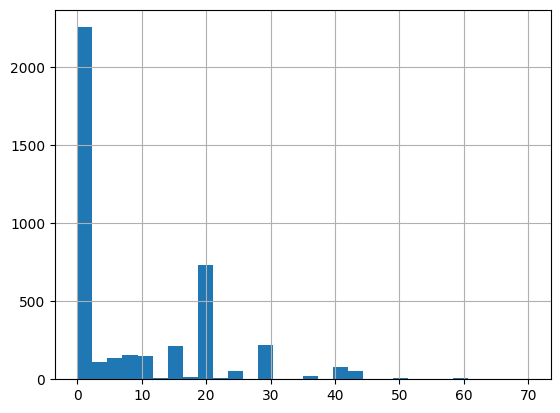

In [135]:
df['cigsPerDay'].hist(bins=30)#

observation : 

 - 50,60 or 70 cigratte using daily is very rare happens 
 - so set upper limit as 40 [that is daily 2 packets ]

In [136]:
limit = 40 
df['cigsPerDay'] = df['cigsPerDay'].clip(upper=limit)


In [137]:
df['cigsPerDay'].value_counts().sort_index()

cigsPerDay
0.0     2173
1.0       67
2.0       18
3.0      100
4.0        9
5.0      121
6.0       18
7.0       12
8.0       11
9.0      130
10.0     143
11.0       5
12.0       3
13.0       3
14.0       2
15.0     210
16.0       3
17.0       7
18.0       8
19.0       2
20.0     734
23.0       6
25.0      55
29.0       1
30.0     217
35.0      22
38.0       1
40.0     157
Name: count, dtype: int64

### by medical related feature as BMI and heartRate

#### in BMI value < 10 and value > 50 is outlier  , value >= 40 is danger situation

In [142]:
df['BMI'].value_counts().sort_index()

BMI
15.54     1
15.96     1
16.48     1
16.59     2
16.61     1
         ..
39.82     1
39.88     1
39.91     1
39.94     2
40.00    26
Name: count, Length: 1338, dtype: int64

In [161]:
limit = 40
df['BMI'] = df['BMI'].clip(upper=limit)

In [144]:
df['BMI'].value_counts().sort_index()

BMI
15.54     1
15.96     1
16.48     1
16.59     2
16.61     1
         ..
39.82     1
39.88     1
39.91     1
39.94     2
40.00    26
Name: count, Length: 1338, dtype: int64

<Axes: >

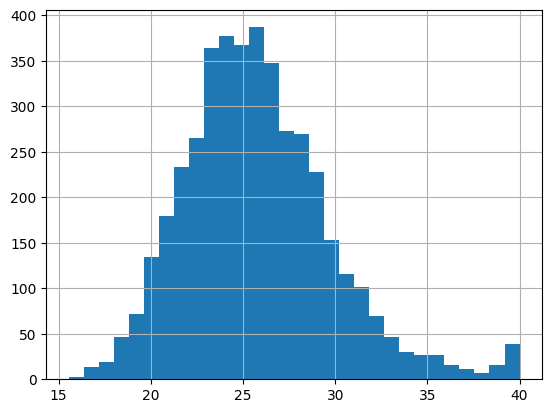

In [145]:
df['BMI'].hist(bins=30)

#### by heart rate , On a minute 30 bpmh is outlier also 200bpmh outlier 


In [146]:
df['heartRate'].describe()

count    4238.000000
mean       75.878716
std        12.025185
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [147]:
df['heartRate'].value_counts().sort_index()

heartRate
44.0     1
45.0     2
46.0     1
47.0     1
48.0     5
        ..
122.0    2
125.0    3
130.0    1
140.0    1
143.0    1
Name: count, Length: 73, dtype: int64

In [148]:
df[df['heartRate'] < 60]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
87,0,61,2.0,1,1.0,0,0,1,0,312.0,175.0,104.0,38.46,57.0,78.0,0
99,0,56,1.0,1,15.0,0,0,0,0,269.0,121.0,75.0,22.36,50.0,66.0,0
116,1,60,1.0,0,0.0,0,0,1,0,278.0,160.5,96.0,26.40,55.0,75.0,1
137,1,61,2.0,0,0.0,0,0,0,0,246.0,124.0,70.0,25.63,55.0,78.0,1
144,0,56,1.0,1,3.0,0,0,1,0,279.0,136.0,94.0,32.99,50.0,102.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,0,62,1.0,0,0.0,0,0,0,0,207.0,127.5,75.0,22.91,58.0,80.0,0
4163,1,65,4.0,1,6.0,0,0,0,0,236.0,118.5,77.5,24.30,52.0,65.0,1
4195,0,40,2.0,1,9.0,0,0,0,0,207.0,124.0,78.0,22.90,46.0,66.0,0
4207,0,61,4.0,0,0.0,0,0,0,0,261.0,124.0,76.5,23.06,55.0,83.0,1


In [149]:
df['heartRate'].median()

np.float64(75.0)

<Axes: >

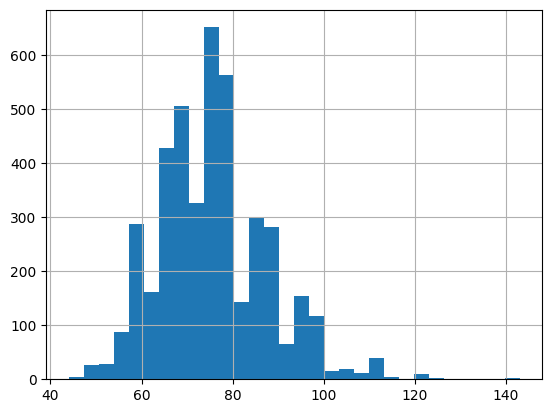

In [150]:
df['heartRate'].hist(bins=30)

In [151]:
df['heartRate'].quantile(0.10)

np.float64(60.0)

### change value by RANDOMIZED SAMPLING WITH IN RANGE

instead of giving upper and lower limit values to outlier , here we can do randomized technique, which select randomly value from overall data and assigning to outlier value without removing 

In [176]:
df.loc[df['heartRate']  ==  115]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2733,1,53,3.0,1,30.0,1,0,1,0,190.0,141.0,104.575,21.01,115.0,86.0,1
3233,0,66,1.0,0,0.0,0,0,1,0,263.0,175.0,95.000,27.07,115.0,94.0,1
3242,1,52,3.0,1,35.0,0,0,1,1,281.0,133.0,93.000,32.27,115.0,80.0,0
3585,0,52,2.0,0,0.0,0,0,0,0,193.0,146.0,89.000,25.37,115.0,84.0,0
3819,0,53,2.0,0,0.0,0,0,1,0,230.0,170.0,104.575,29.55,115.0,107.0,0


<Axes: ylabel='heartRate'>

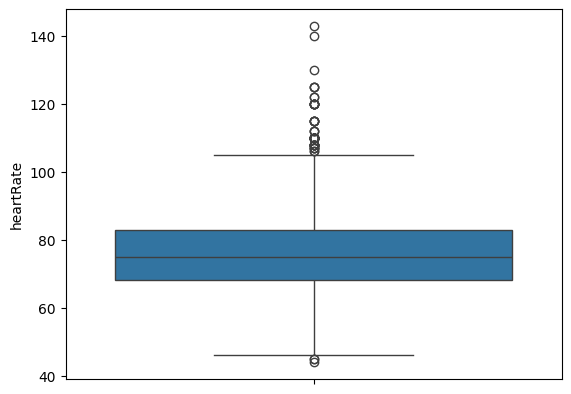

In [178]:
sns.boxplot(df['heartRate'])

#### here the code of, randomized techniques

In [152]:
lower_fence = 53
upper_fence = 122

df['heartRate'] = df['heartRate'].apply(lambda x: round(np.random.uniform(lower_fence,upper_fence) if x < lower_fence or x > upper_fence else x))


In [153]:
df['heartRate'].value_counts().sort_index()

heartRate
53     11
54     15
55     37
56     22
57     18
       ..
117     3
119     1
120     7
121     3
122     2
Name: count, Length: 65, dtype: int64

<Axes: ylabel='heartRate'>

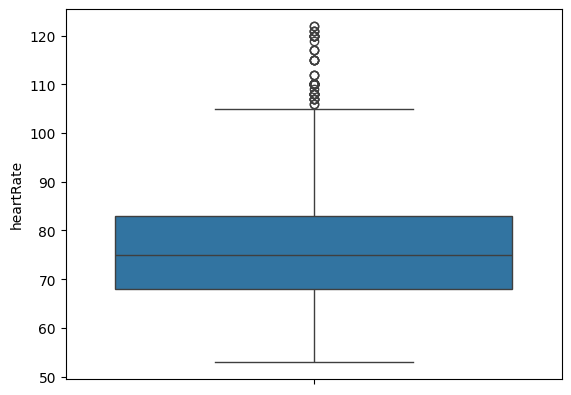

In [154]:
sns.boxplot(df['heartRate'])

    no neef to remove this outlier, becouse of some time it may be poosible due to fitness

## verifying after handling outliers 

#### visualizing - boxplot

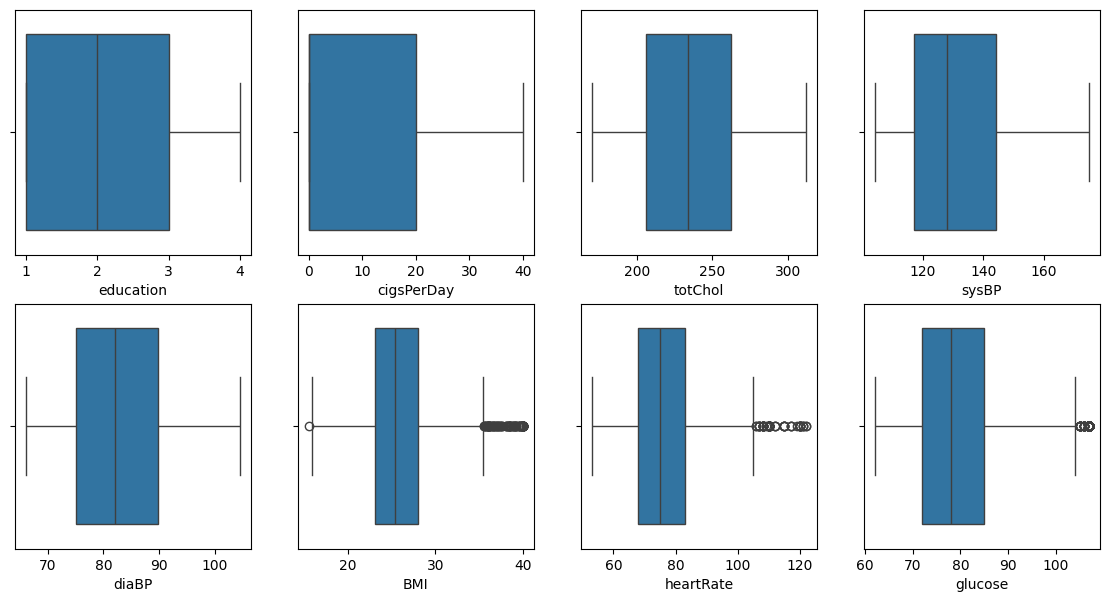

In [156]:
plt.figure(figsize=(14,7))
for x in range(0,len(numerical_features)):
    plt.subplot(2,4,x+1)
    sns.boxplot(x=df[numerical_features[x]])

#### 0bservation  
  - these outliers not need to remove , 

#### checking by z-score 

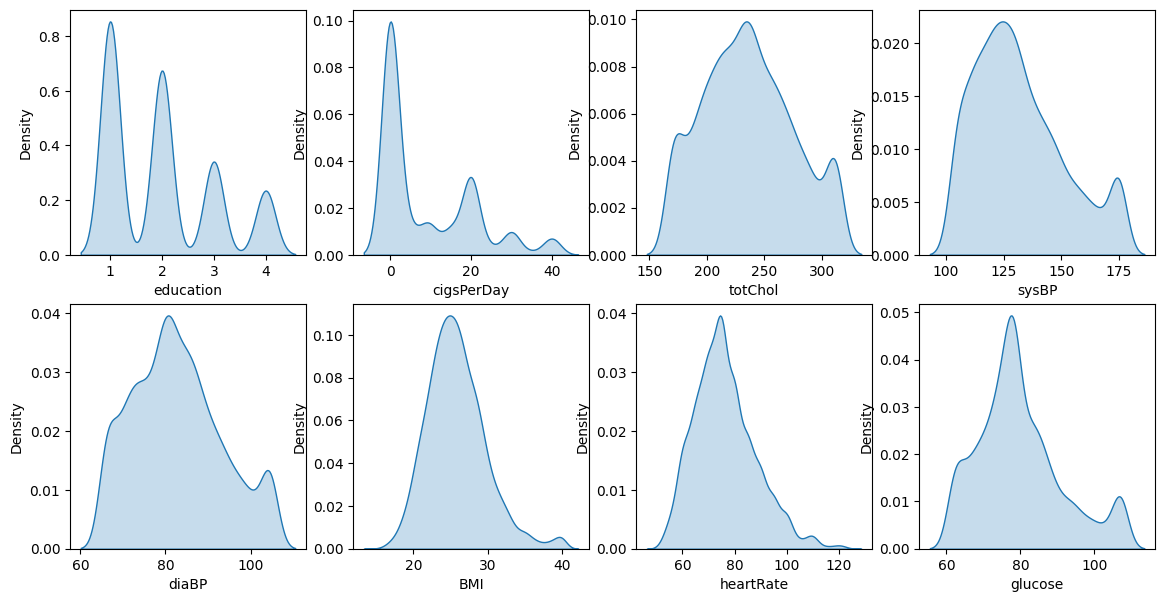

In [157]:
plt.figure(figsize=(14,7))
for x in range(0,len(numerical_features)):
    plt.subplot(2,4,x+1)
    sns.kdeplot(x=df[numerical_features[x]],fill =True)

In [158]:
def check_outlier(data):
    list = []
    for i in range(0,len(data)):
        dataz[data[i]] = zscore(df[data[i]])  # X - mean / standard deviation also mean + 3 * 22[std of feature of glocose ]
        outliers = dataz[dataz[data[i]].abs() > 3]
        list.append(outliers.shape[0])
    return list

In [159]:
from scipy.stats import zscore
dataz = pd.DataFrame()
a_list = check_outlier(numerical_features)
for x in range(0,len(a_list)):
    print(f' {numerical_features[x]} have {a_list[x]} outliers ')

 education have 0 outliers 
 cigsPerDay have 0 outliers 
 totChol have 0 outliers 
 sysBP have 0 outliers 
 diaBP have 0 outliers 
 BMI have 60 outliers 
 heartRate have 24 outliers 
 glucose have 0 outliers 


#### observation 

 - out of 4328 samples  60  peoples have more than 40BMI class3 obesity BMI found , not consider as ooutlier
 - out of 4328 samples  26 peoples may have to heart rate between 53-60 and 100-122 , we cant consider as outier becouse lack of their fitness knowledge , whether the people is rest time  or not 


## outlier CATEGORICAL FEATURES 

In [174]:
df['heartRate'] = df['heartRate'].astype(float)
df.rename(columns={'male':'gender'},inplace=True)
categorical_feature = [ i for i in df.columns if df[i].dtype != 'float' and  i != 'age']

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   int64  
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 529.9 KB


In [176]:
categorical_feature

['gender',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [178]:
for i in range(0,len(categorical_feature)):
    print(f' --- \n\n {df[categorical_feature[i]].value_counts()}')



 --- 

 gender
0    2419
1    1819
Name: count, dtype: int64
 --- 

 currentSmoker
0    2144
1    2094
Name: count, dtype: int64
 --- 

 BPMeds
0    4114
1     124
Name: count, dtype: int64
 --- 

 prevalentStroke
0    4213
1      25
Name: count, dtype: int64
 --- 

 prevalentHyp
0    2922
1    1316
Name: count, dtype: int64
 --- 

 diabetes
0    4129
1     109
Name: count, dtype: int64
 --- 

 TenYearCHD
0    3594
1     644
Name: count, dtype: int64


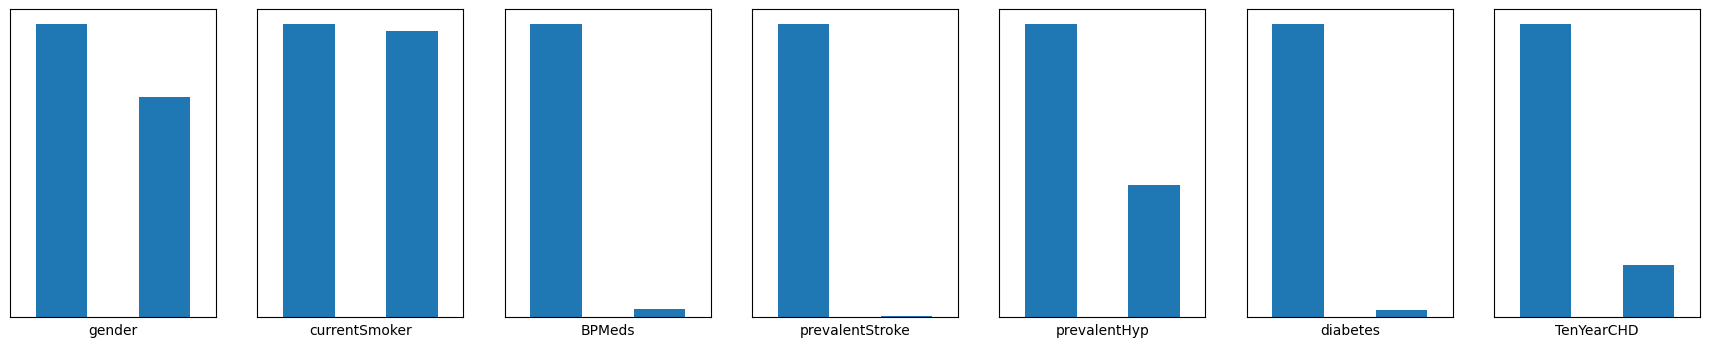

In [184]:
plt.figure(figsize=(25,4))
for x in range(0,len(categorical_feature)):
    plt.subplot(1,8,x+1)
    df[categorical_feature[x]].value_counts().plot(kind='bar')
    plt.xticks([])
    plt.yticks([])


### proven [ IMBALANANCED DATA ]

should be solved by class_weight method in logistic regression if we are using logistic  

## Duplicate data 

In [185]:
duplicate = df[df.duplicated()]

In [186]:
duplicate

male,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### duplicate on specfic column 

In [187]:
duplicate_column = df[df.duplicated(subset=df.columns)]

In [188]:
duplicate_column

male,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [189]:
df

male,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0,0,1,0,312.0,175.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,40.0,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


In [190]:
df.to_csv('data_cleaned1.csv',index=False)